In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

X = data["data"]
y = data["target"]

df = pd.DataFrame(X)
df["class"] = y
df["class"] = df["class"].replace({0:"Setosa",1:"Versicolour",2:"Virginica"})
np.random.seed(0)
ix = np.random.choice([False, True], size = df.shape, p = [0.9, 0.1])
df[ix] = np.nan
df

In [197]:
category = [col for col in df.columns if df[col].dtype == "O"]
category

['class']

In [206]:
numeric = list(df._get_numeric_data().columns)
numeric

[0, 1, 2, 3]

In [201]:
df.isnull().mean()

0        0.100000
1        0.080000
2        0.113333
3        0.113333
class    0.146667
dtype: float64

In [203]:
missing_ix = df.isnull()

In [204]:
df[category] = SimpleImputer(strategy="most_frequent").fit_transform(df[category])

In [207]:
df[numeric] = SimpleImputer(strategy="median").fit_transform(df[numeric])

In [ ]:
missing_ix

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_iter = 3
for j in range(max_iter):
    for i in range(df.shape[1]):
        col = df.columns[i]
        y = df[col]
        X = df.drop(col, axis = 1)
        ix = np.logical_not(missing_ix[col])
        na_ix = missing_ix[col]
        y = y[ix]
        X = X.loc[ix]
        X = pd.get_dummies(X, drop_first = True)
        if df[col].dtype == "O":
            mdl = RandomForestClassifier()
            mdl.fit(X,y)
            df_temp = df.drop(col, axis = 1)
            df.loc[na_ix,col] = mdl.predict(pd.get_dummies(df_temp, drop_first = True).loc[na_ix])
        else:
            mdl = RandomForestRegressor()
            mdl.fit(X,y)
            df.loc[na_ix,col] = mdl.predict(pd.get_dummies(df, drop_first = True).loc[na_ix].drop(col, axis = 1))


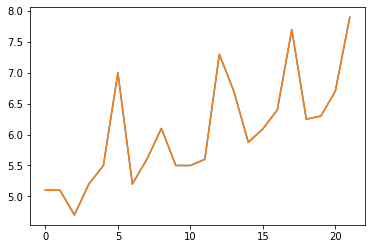

In [257]:
plt.plot(df[0][missing_ix[col]].values)
plt.plot(data["data"][missing_ix[col],0])

In [249]:
pd.get_dummies(df, drop_first = True).loc[na_ix].drop(col, axis = 1)

,0,2,3,class_Versicolour,class_Virginica
50,7.000,4.700,1.400,1,0
55,6.299,4.500,1.300,1,0
57,4.900,3.300,1.000,1,0
72,6.300,4.900,1.500,1,0
80,5.500,3.800,1.086,1,0
84,6.025,4.500,1.500,1,0
85,6.000,4.500,1.600,1,0
90,5.500,4.400,1.200,1,0
94,5.600,4.200,1.300,1,0
128,6.400,5.449,2.100,0,1


In [ ]:
i = 0
col = df.columns[i]
y = df[col]
X = df.drop(col, axis = 1)
ix = np.logical_not(missing_ix[col])
na_ix = missing_ix[col]
y = y[ix]
X = X.loc[ix]
X = pd.get_dummies(X, drop_first = True)
if df[col].dtype == "O":
    mdl = RandomForestClassifier()
else:
    mdl = RandomForestRegressor()

mdl.fit(X,y)
df.loc[na_ix,col] = mdl.predict(pd.get_dummies(df.loc[na_ix].drop(col, axis = 1), drop_first = True))

In [238]:
mdl.predict(pd.get_dummies(df.loc[na_ix].drop(col, axis = 1), drop_first = True))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([5.066     , 5.23675   , 4.6964    , 4.8455    , 6.3199    ,
       5.91508333, 5.366     , 6.144     , 5.349     , 5.8325    ,
       5.975     , 6.8812    , 6.462     , 6.139     , 6.166     ])

In [230]:
X

,1,2,3,class_Setosa,class_Versicolour,class_Virginica
0,3.5,1.4,0.2,1,0,0
1,3.0,1.4,1.3,1,0,0
2,3.2,1.3,1.3,1,0,0
3,3.1,1.5,0.2,1,0,0
5,3.9,4.4,0.4,1,0,0
...,...,...,...,...,...,...
145,3.0,4.4,2.3,0,0,1
146,2.5,5.0,1.9,0,0,1
147,3.0,5.2,2.0,0,0,1
148,3.0,5.4,2.3,0,0,1
